In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

t_steps = 4
x_steps = 3
i_steps = 3

In [2]:
def load_errors():
    dataType = np.float32
    data = np.fromfile("analyzing/error_Npart.txt", dataType)

    size_x = t_steps * x_steps * i_steps + 2 * x_steps * t_steps
    size_y = 5
    data = np.reshape(data, (size_y, size_x))
    return data


def loadFile(filename, shape):
    dataType = np.float32
    data = np.fromfile('analyzing/' + filename, dataType)

    data = np.reshape(data, (shape[0], shape[1]))
    return data

In [3]:
data = load_errors()
x = [0.1, 0.05, 0.01]
dt = 0.2, 0.1, 0.05, 0.01
dt2 = 0.4, 0.2, 0.1, 0.02
interp = 'Bilinear', 'Bicubic', 'Bicubic spline'

Error scales as $e pprox C * n^a$, where $n$ is number of timesteps.  

splines,$\Delta t$ = 0.05 $\Delta x$= 0.05, C = 0.05235514, a = 0.87827641 

Average error at tmax: 5.3302226

splines,$\Delta t$ = 0.05 $\Delta x$= 0.01, C = 4.6709258e-05, a = 1.8120959 

Average error at tmax: 0.83948445

RK4 - double step,$\Delta t$ = 0.1 $\Delta x$ = 0.05, C = 0.19506826, a = 0.85496348 

Average error at tmax: 5.297842

RK4 - double step,$\Delta t$ = 0.1 $\Delta x$ = 0.01, C = 0.015501401, a = 0.84908175 

Average error at tmax: 0.81589204



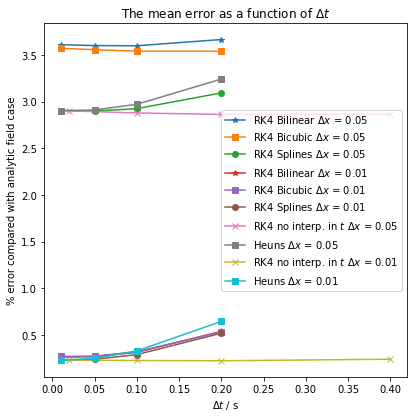

In [12]:
meanPlot = plt.figure(figsize=(6.5,6.5))

print("Error scales as $e \approx C * n^a$, where $n$ is number of timesteps.  \n")

for dx in range(1, x_steps):
    plt.plot(dt, data[0, t_steps * dx:t_steps * dx + t_steps],
             marker='*', label='RK4 Bilinear $\Delta x$ = ' + str(x[dx]))
    plt.plot(
        dt, data[0, t_steps * x_steps + t_steps *
                 dx:t_steps * dx + t_steps * x_steps + t_steps],
        marker='s', label='RK4 Bicubic $\Delta x$ = ' + str(x[dx])
    )
    plt.plot(
        dt, data[0, 2 * t_steps * x_steps + t_steps *
                 dx:t_steps * dx + t_steps + 2 * t_steps * x_steps],
        marker='o', label='RK4 Splines $\Delta x$ = ' + str(x[dx])
    )
    print(
        "splines,$\Delta t$ = 0.05 $\Delta x$= " + repr(x[dx]) +
        ", C = " +
        repr(data[4, 2 * t_steps * x_steps + t_steps * dx + 1])
        + ", a = " +
        repr(data[3, 2 * t_steps * x_steps + t_steps * dx + 1])
        + " \n"
    )
    print(
        "Average error at tmax: " +
        repr(data[2, 2 * t_steps * x_steps + t_steps * dx + 3]) + "\n"
    )
for dx in range(1, x_steps):
    plt.plot(
        dt2, data[0, i_steps * t_steps * x_steps +
                 t_steps * dx:t_steps * dx + t_steps +
                 i_steps * t_steps * x_steps],
        marker='x',  label='RK4 no interp. in $t$ $\Delta x$ = ' + str(x[dx])
    )

    plt.plot(
        dt, data[0, i_steps * t_steps * x_steps +
                 t_steps * x_steps + t_steps * dx:t_steps * dx +
                 t_steps + t_steps * x_steps + i_steps * t_steps * x_steps],
        marker='s', label='Heuns $\Delta x$ = ' + str(x[dx])
    )

    print(
        "RK4 - double step,$\Delta t$ = 0.1 $\Delta x$ = " + repr(x[dx]) +
        ", C = " +
        repr(data[4, i_steps * t_steps * x_steps +
                  3 * dx + 1])
        + ", a = " +
        repr(data[3, i_steps * t_steps * x_steps +
                  3 * dx + 1])
        + " \n"
    )
    print(
        "Average error at tmax: " + repr(data[2, i_steps * t_steps * x_steps +
                                              t_steps * dx + 1]) + "\n"
    )
plt.xlabel('$\Delta t$ / s')
plt.ylabel('% error compared with analytic field case') 
plt.title('The mean error as a function of $\Delta t$') 
#plt.yscale('log')
#plt.xscale('log')
plt.legend()
#plt.savefig('figures/error_mean.png', dpi=200)
plt.show()

In [5]:
data = load_errors()
x = [0.1, 0.05, 0.01]
dt = 0.2, 0.1, 0.05, 0.01
interp = 'Bilinear', 'Bicubic', 'Bicubic spline'

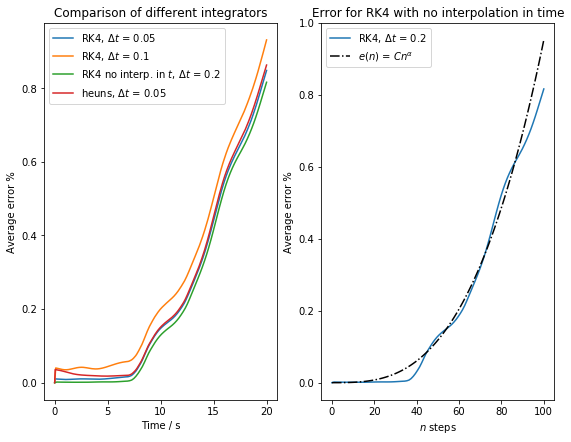

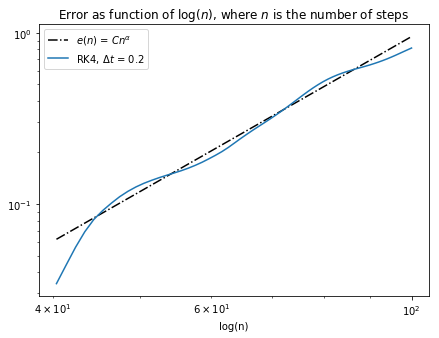

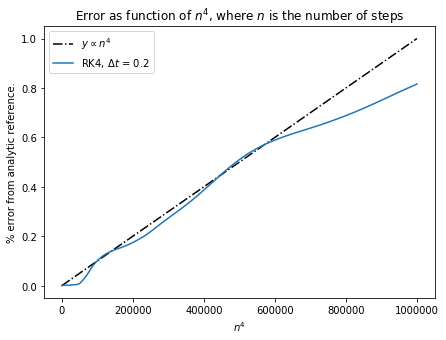

In [6]:

tmax = 20
rk4Shape1 = int(tmax / 0.05), 1, 1
error_RK41 = loadFile('RK4_error1.txt', rk4Shape1)

rk4Shape2 = int(tmax / 0.1), 1, 1
error_RK42 = loadFile('RK4_error2.txt', rk4Shape2)

rk4_2xShape = int(tmax / 0.2), 1, 1
error_RK4_2xdt = loadFile('RK4_2xdt_error.txt', rk4_2xShape)

heunsShape = int(tmax / 0.05), 1, 1
error_heuns = loadFile('heuns_error.txt', heunsShape)


    
    
    
f, errorplots = plt.subplots(1, 2, figsize=(8,6))
errorplots[0].plot(np.linspace(0, tmax, rk4Shape1[0]),
                   error_RK41, label='RK4, $\Delta t$ = 0.05')
errorplots[0].plot(np.linspace(0, tmax, rk4Shape2[0]),
                   error_RK42, label='RK4, $\Delta t$ = 0.1')
errorplots[0].plot(np.linspace(0, tmax, rk4_2xShape[0]),
                   error_RK4_2xdt, label='RK4 no interp. in $t$, $\Delta t$ = 0.2')
errorplots[0].plot(np.linspace(0, tmax, heunsShape[0]),
                   error_heuns, label='heuns, $\Delta t$ = 0.05')
errorplots[0].set_title('Comparison of different integrators')
errorplots[0].set_xlabel('Time / s')
errorplots[0].legend()
errorplots[1].plot(np.linspace(0,rk4_2xShape[0], rk4_2xShape[0]), error_RK4_2xdt, label='RK4, $\Delta t$ = 0.2')



# ns = np.linspace(0,rk4_2xShape[0], rk4_2xShape[0])
# approx = np.power(ns, data[3, i_steps * t_steps * x_steps +
#                   t_steps * 2 +1]) * data[4, i_steps * t_steps * x_steps +
#                     t_steps * 2 +1]

ns = np.linspace(0,rk4_2xShape[0], rk4_2xShape[0])
approx = np.power(ns, data[3, i_steps * t_steps * x_steps +
                  t_steps * 2 +1]) * data[4, i_steps * t_steps * x_steps +
                    t_steps * 2 +1]
#log_err = np.log(error_RK4_2xdt[0:100]) / np.log(3)
#approx = np.power(ns,3.5) * 0.00000008

errorplots[1].plot(np.linspace(0, rk4_2xShape[0], rk4_2xShape[0]), approx, 'k-.', label=r'$e(n)$ = $Cn^{\alpha}$')
errorplots[1].set_title('Error for RK4 with no interpolation in time')
errorplots[1].legend()
#errorplots[1].set_yscale('log')
#errorplots[1].set_xscale('log')
errorplots[1].set_xlabel('$n$ steps')
errorplots[0].set_ylabel('Average error %')
errorplots[1].set_ylabel('Average error %')
#f.subplots_adjust(hspace=4.6)
plt.tight_layout(pad=0.2)
#f.savefig('figures/errorPlot_T20.png', dpi = 300)


ns4 = np.power(ns, 3)

f, logplot = plt.subplots(1, figsize=(7,5))

logplot.plot(ns[40:100], approx[40:100], 'k-.', label=r'$e(n)$ = $Cn^{\alpha}$')
logplot.plot(ns[40:100], error_RK4_2xdt[40:100], label='RK4, $\Delta t$ = 0.2')

logplot.set_yscale('log')
logplot.set_xscale('log')
logplot.set_xlabel('log(n)')
#logplot.set_xticks([])
#logplot.set_yticks([])
logplot.set_title('Error as function of log($n$), where $n$ is the number of steps')
plt.legend()
#f.savefig('figures/error_loglog_T20.png', dpi = 300)
f, n4plot = plt.subplots(1, figsize=(7,5))

n4plot.plot(ns4[0:100], 1e-6*ns4[0:100], 'k-.', label=r'$y\propto n^4$')
n4plot.plot(ns4[0:100], error_RK4_2xdt[0:100], label='RK4, $\Delta t$ = 0.2')

#n4plot.set_yscale('log')
#n4plot.set_xscale('log')
n4plot.set_xlabel('$n^4$')
n4plot.set_ylabel('% error from analytic reference.')
#n4plot.set_xticks([])
#n4plot.set_yticks([])
n4plot.set_title('Error as function of $n^4$, where $n$ is the number of steps')
plt.legend()
#f.savefig('figures/error_n4_T20.png', dpi = 300)
#plt.ylim(0, 1)
plt.show()